In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')


In [19]:
df.shape

(11251, 15)

In [21]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [25]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [27]:
df.drop(['Status','unnamed1'], axis=1 ,inplace=True)

In [29]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [33]:
df['Amount']=df['Amount'].astype('int')

# Exploratory Data Analysis

## Gender

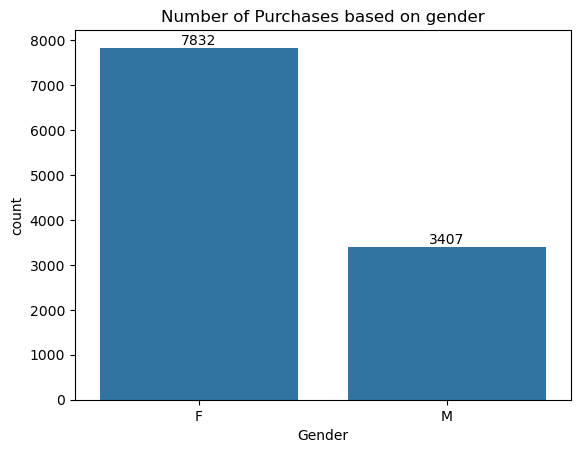

In [37]:
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Number of Purchases based on gender")

Text(0.5, 1.0, 'Revenue based on gender')

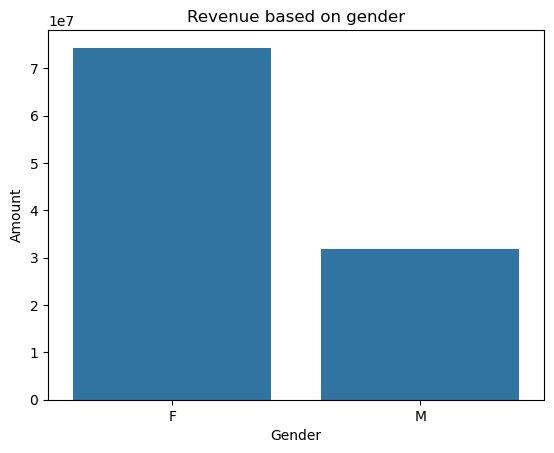

In [39]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x= 'Gender',y='Amount', data=sales_gen)
plt.title("Revenue based on gender")

Most of the buyers are female and also the total amount of purchases made by female is higher than men

## Age

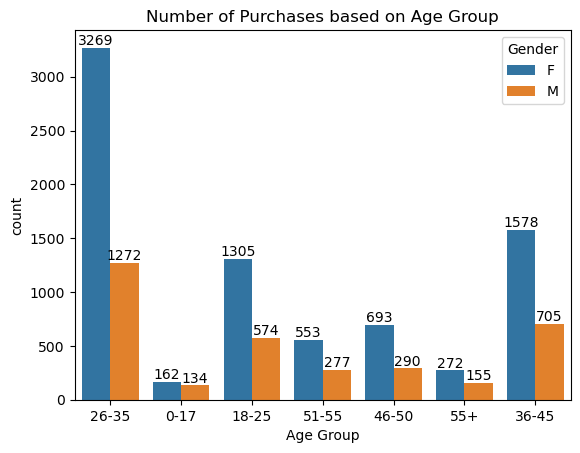

In [41]:
ax = sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Number of Purchases based on Age Group")

Text(0.5, 1.0, 'Revenue based on gender')

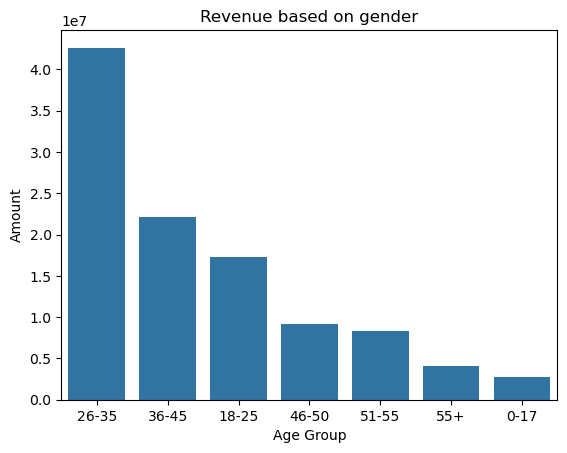

In [43]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)
plt.title("Revenue based on Age Group")

Most of the buyers are in the age group of 26-35 and are female.


## State

Text(0.5, 1.0, 'Number of Purchases based on States')

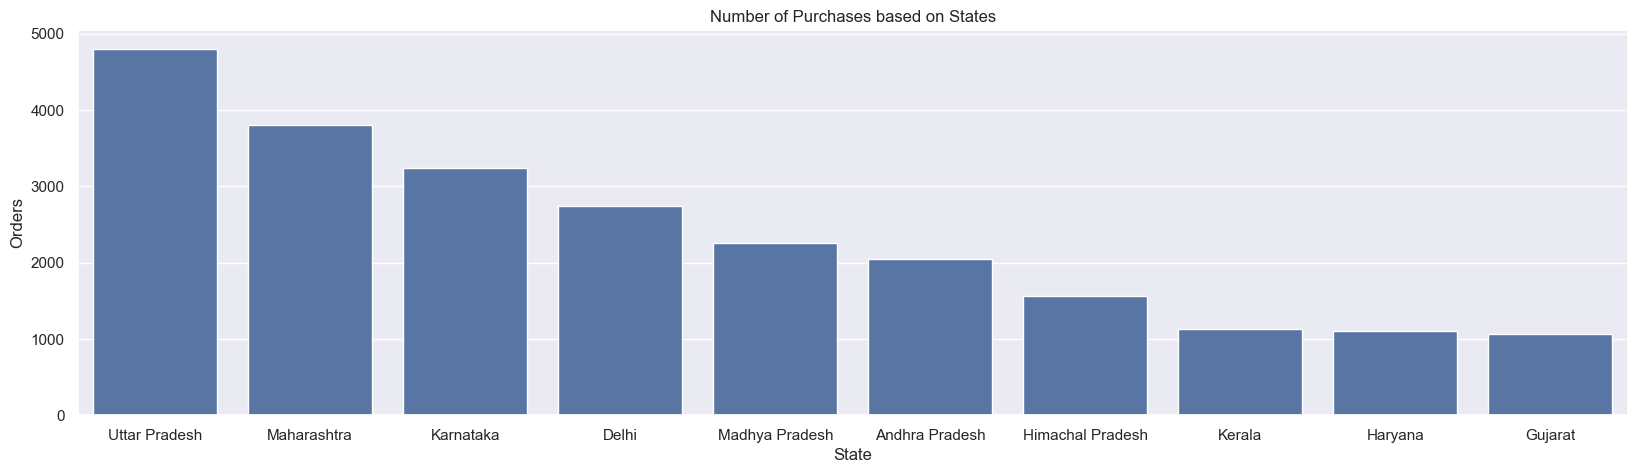

In [51]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='State',y='Orders')
plt.title("Number of Purchases based on States")

Text(0.5, 1.0, 'Revenue based on State')

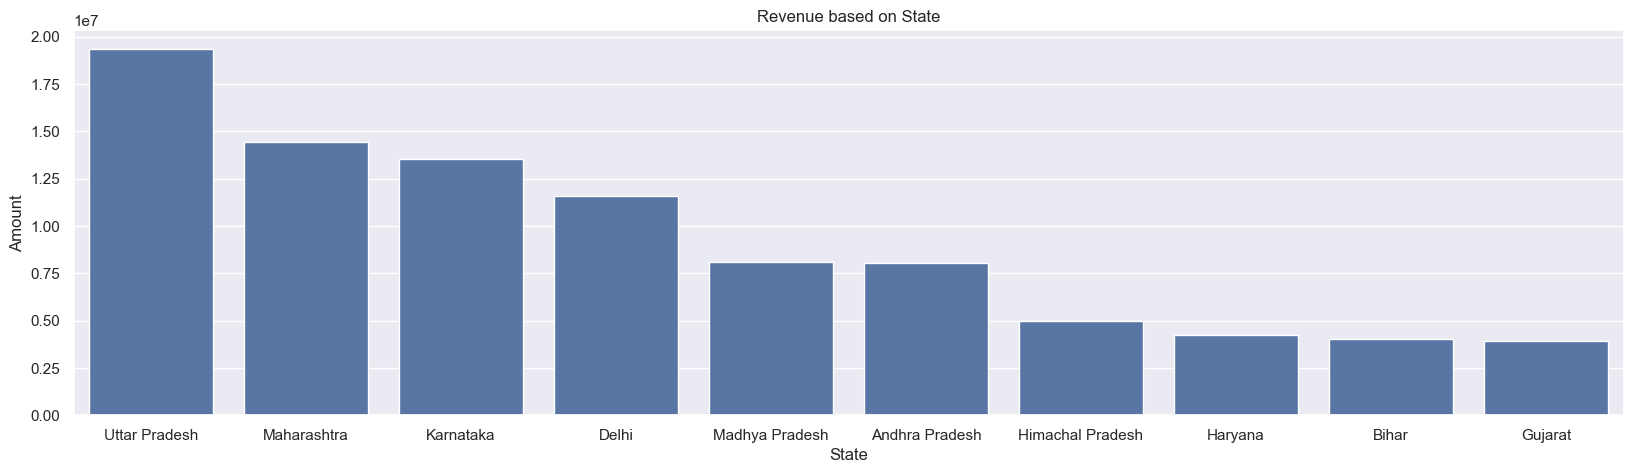

In [53]:
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='State',y='Amount')
plt.title("Revenue based on State")

Most of the oreders were placed in Uttar Pradesh, Maharashtra and Karnataka

## Marital Status

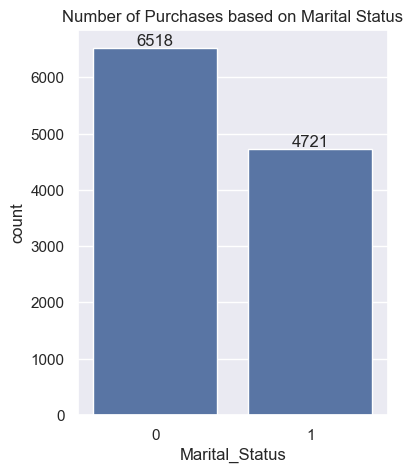

In [57]:
ax = sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(4,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Number of Purchases based on Marital Status")

Text(0.5, 1.0, 'Revenue based on Marital Status')

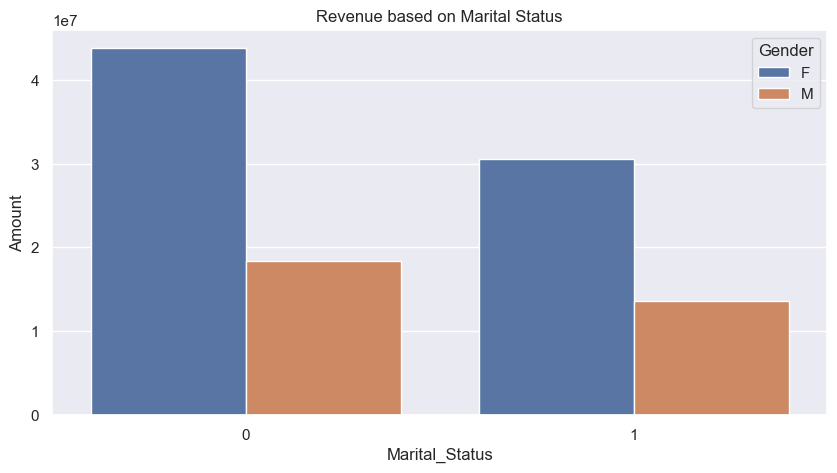

In [45]:
sales_status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=sales_status,x='Marital_Status',y='Amount',hue='Gender')
plt.title("Revenue based on Marital Status")

Most of the sales is done by married women.

## Occupation

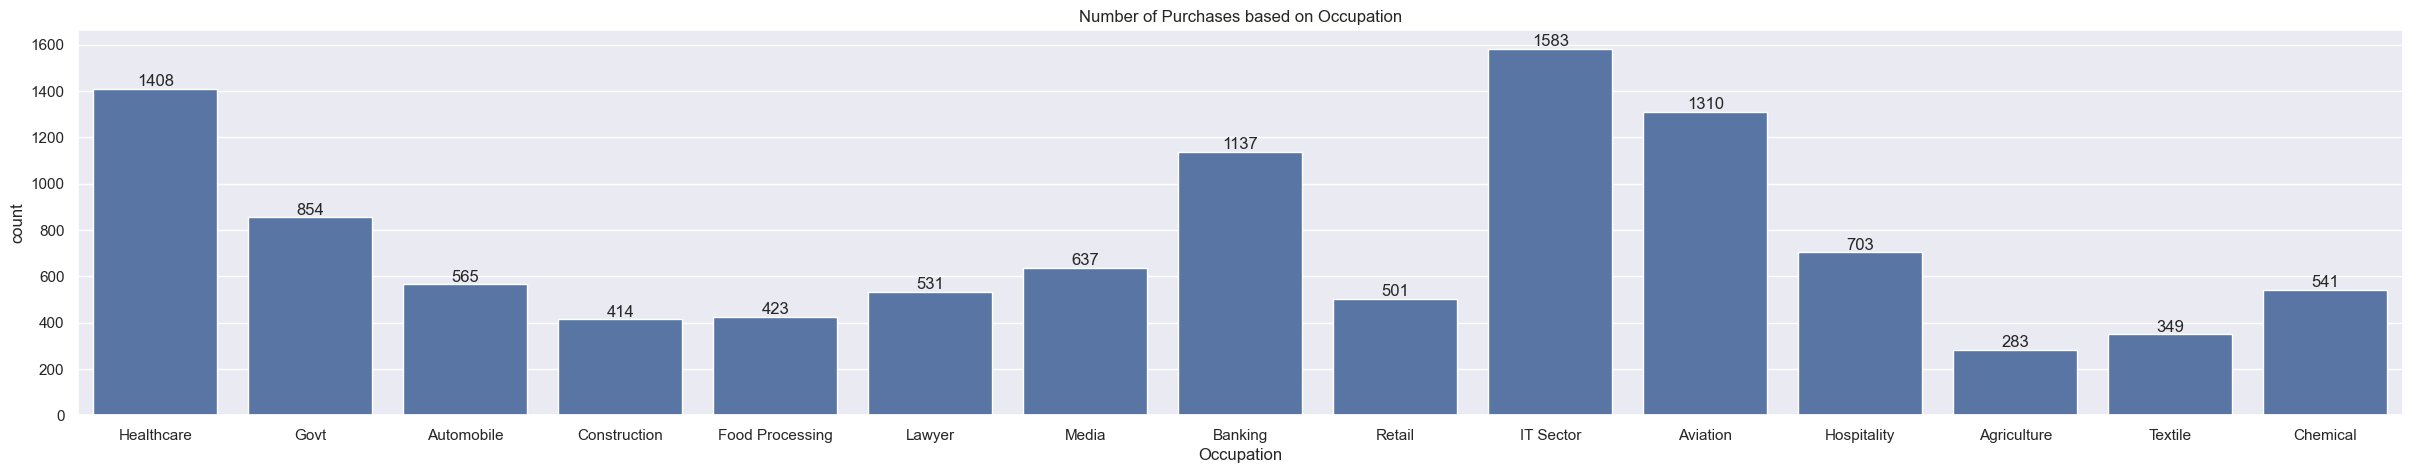

In [61]:
ax = sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Number of Purchases based on Occupation")

Text(0.5, 1.0, 'Revenue based on Occupation')

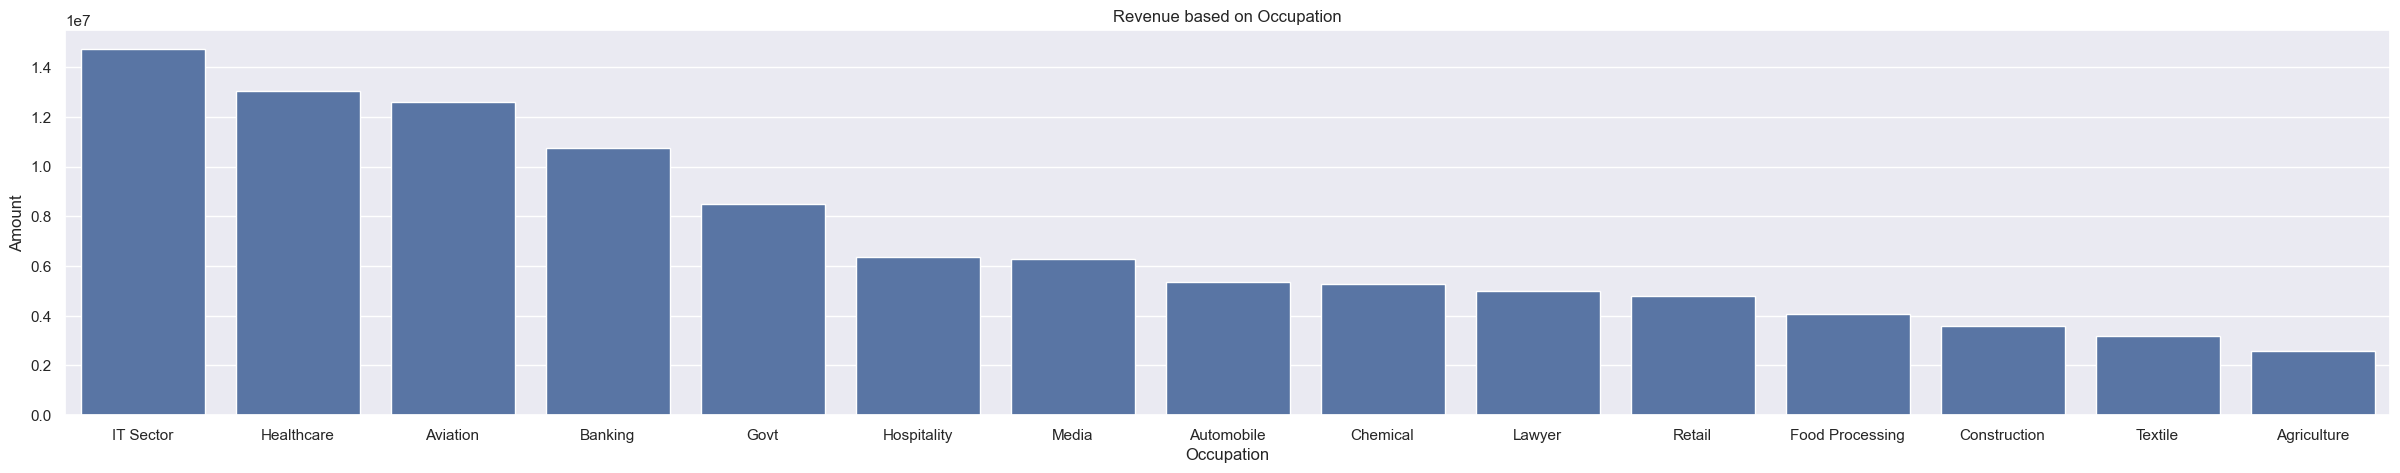

In [63]:
occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=occupation,x='Occupation',y='Amount')
plt.title("Revenue based on Occupation")

Maximum sales is done by customers working in IT,Healthcare and Aviation Sector.

## Product Category

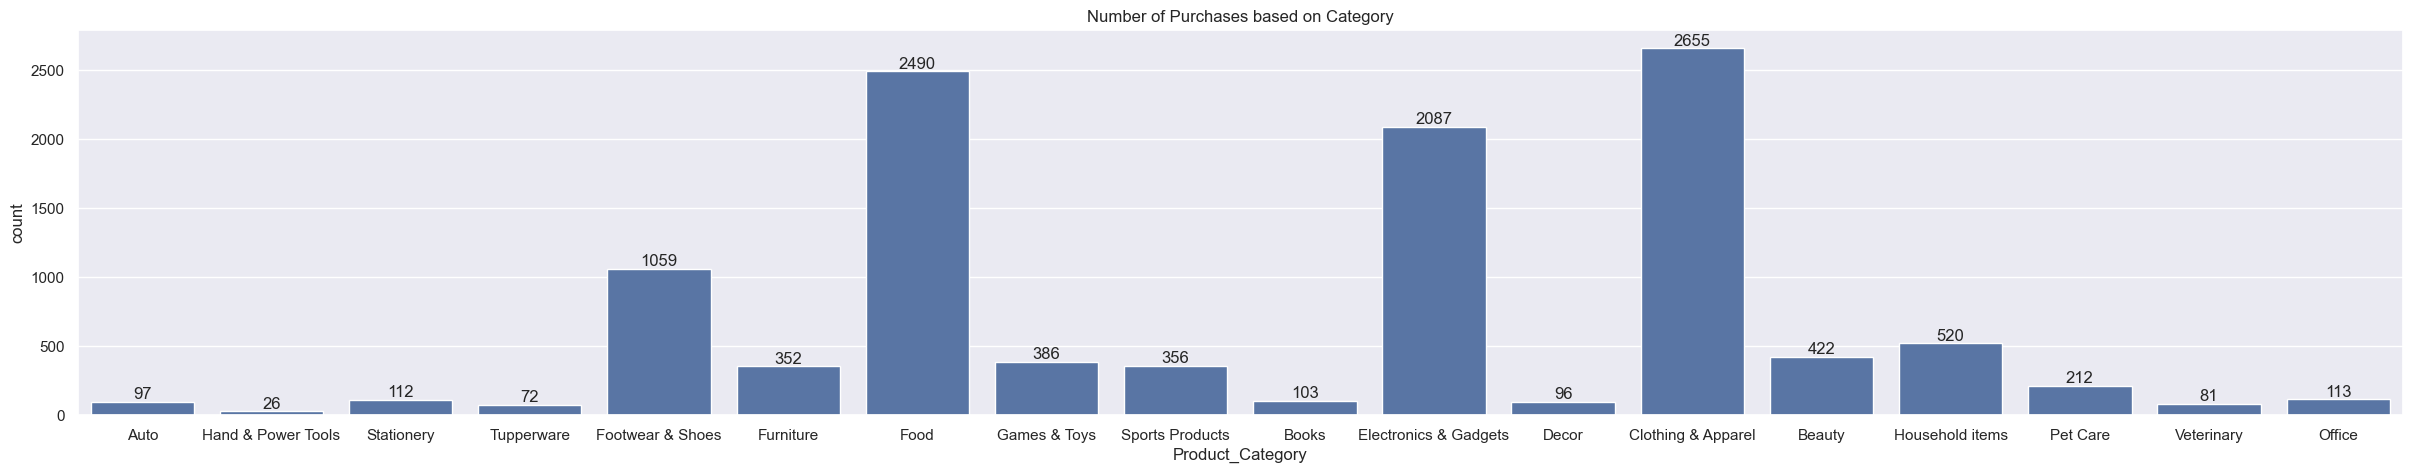

In [67]:
ax = sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Number of Purchases based on Category")

Text(0.5, 1.0, 'Revenue based on Product Category')

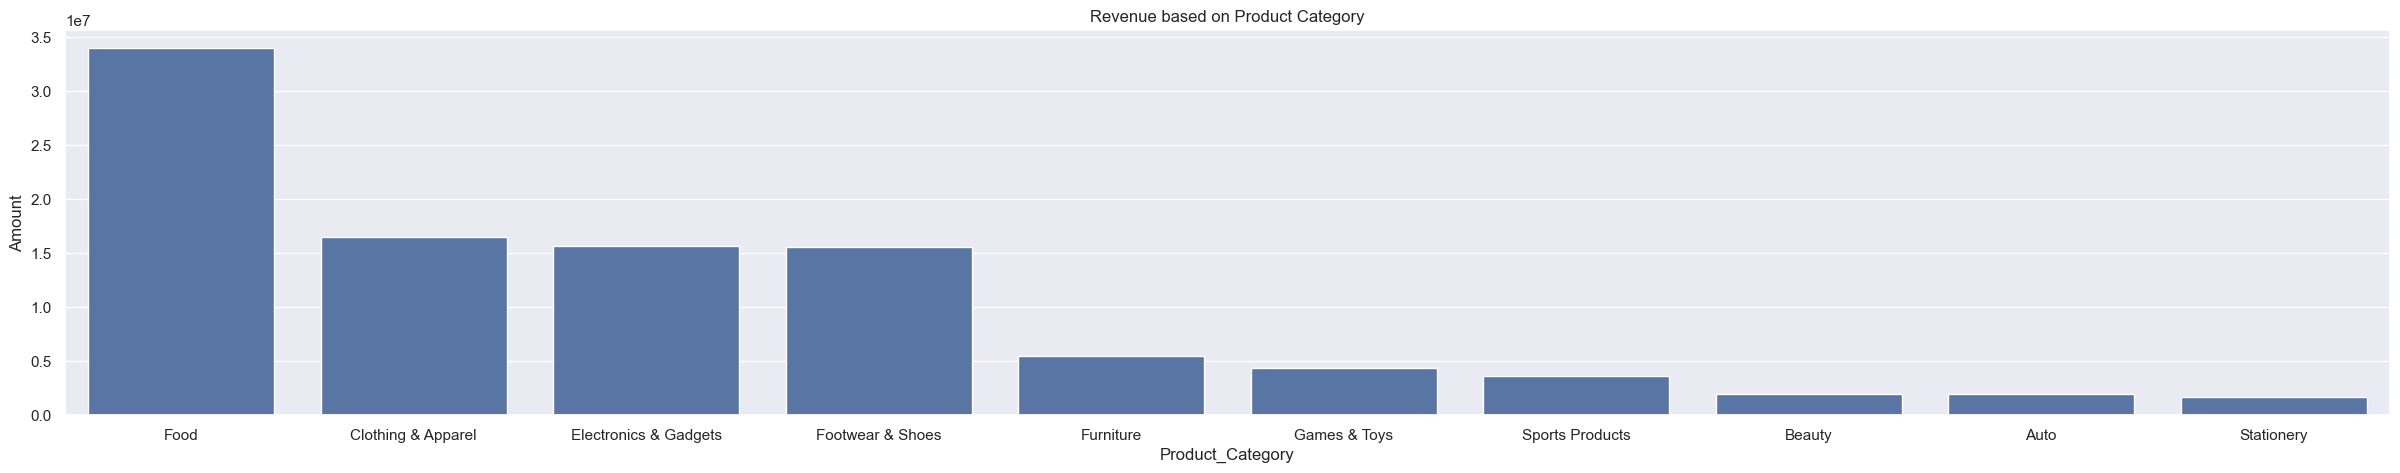

In [69]:
prod = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=prod,x='Product_Category',y='Amount')
plt.title("Revenue based on Product Category")

Most Sold product categories are food, clothing and electronics.

## Product ID

Text(0.5, 1.0, "Number of Oders based on Product ID's")

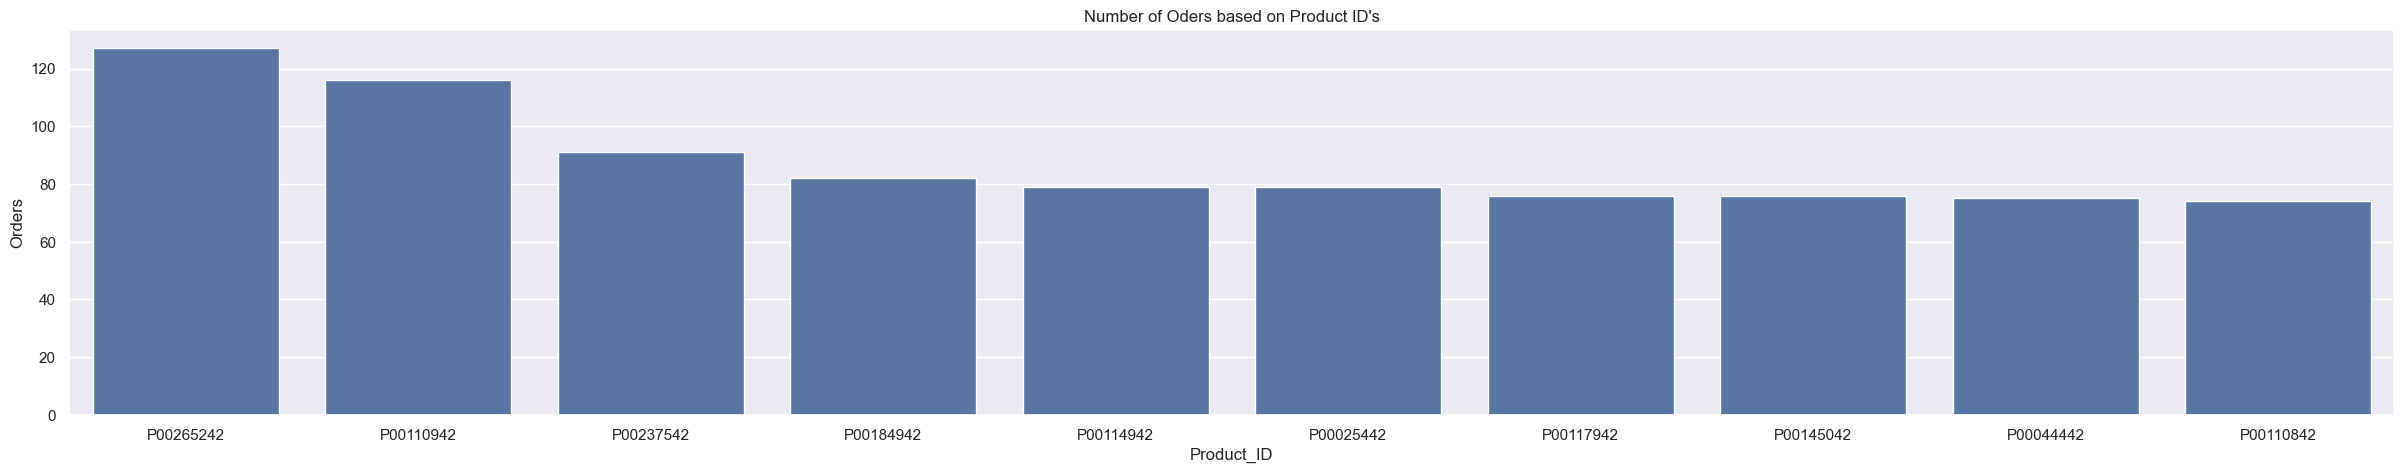

In [71]:
id = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=id,x='Product_ID',y='Orders')
plt.title("Number of Oders based on Product ID's")

# Conclusion

Married women age group 26-35 yrs from Uttar Pradesh, Maharashtra and Karnataka working in IT, Healthcare and Aviation Sector are more likely to buy products from Food, Clothing and Electronic gadgets categories.